<a href="https://colab.research.google.com/github/Ahiruk/Lab02_mdeltoroa_santoyal_slcabana/blob/main/Lab02_mdeltoroa_santoyal_slcabana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

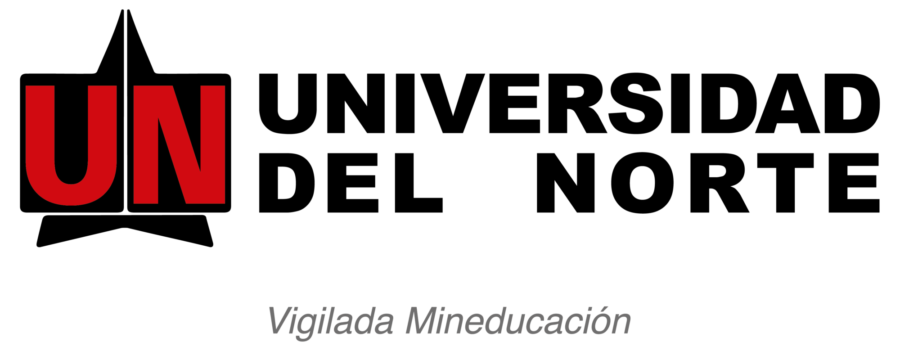

**IST7420 - Optimización**

Laboratorio 2: Algoritmos de optimización en machine learning

\\
**Presentado a:**

Ph.D Margarita Gamarra Acosta

**Presentado por:**

1.   Maria Alejandra Del Toro Rodriguez
2.   Luisa Fernanda Guzman Santoya
3.   Sergio Luis Rodríguez Cabana




# Sobre el Dataset Seleccionado...
---



> Para cumplir con el objetivo de este laboratorio que es: "Analizar el comportamiento de algoritmos de optimización en aplicaciones de machine learning" se selecciono el dataset "*Breast Cancer Wisconsin (Diagnostic) Data Set*" obtenido de [kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) que actualmente cuenta con un total de 569 muestras.

Este dataset se utiliza comúnmente para la clasificación de cáncer de mama (benigno o maligno) a partir de características extraídas de imágenes digitales de una aspiración con aguja fina de una masa mamaria. Las características describen diferentes propiedades de los núcleos celulares en las imágenes.




```
# Importacion de Dataset
```



In [ ]:
import kagglehub
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")# Download latest version
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


## Variables independientes (características o predictores):

> Este Dataset cuenta con 30 variables independientes que representan varias características de los núcleos celulares. Estas variables se calculan para cada imagen en tres dimensiones: el valor medio, el error estándar y el peor (mayor) valor de cada característica.



1.  ***Radius:*** *Se refiere a la distancia desde el centro hasta los puntos en el perímetro del núcleo celular.*
2.  ***Texture:*** *Desviación estándar de los valores de escala de grises.*
3.  ***Perimeter:*** *Contiene la medida del contorno del núcleo.*
4. ***Area:*** *Cantidad de espacio que ocupa el núcleo celular.*
5. ***Smoothness:*** *Corresponde a la variación local en las longitudes de radio.*
6. ***Compactness:*** *Detalla la eelación entre el perímetro y el área  $(\frac{Perimetro^2}{Area - 1})$*
7. ***Concavity:*** *Severidad de las porciones cóncavas del contorno.*
8. ***Concave Points:*** *Número de porciones cóncavas del contorno.*
9. ***Symmetry:*** *Simetría del contorno del núcleo celular.*
10. ***Fractal Dimension:*** *Aproximación del contorno (dimensión fractal).*










## Variable dependiente (salida):


> La variable dependiente de este dataset corresponde a *´diagnosis´* que indica si el tejido es maligno o benigno: $(M = malignant, B = benign)$



# Antes de comenzar...

In [ ]:
#Importacion de librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
#Cargardo de el dataset en un DataFrame de pandas
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        dataset_file = os.path.join(path, file_name)
        break

df = pd.read_csv(dataset_file)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Relacion entre las variables...


> Para observar la relación entre las características y la variable de salida, usaremos `pandas.plotting.scatter_matrix` para crear una matriz de dispersión *(scatter matrix)*. **Esta visualización nos permite ver las relaciones entre las características seleccionadas y cómo se distribuyen en función de la variable de salida.**



Primero seleccionamos las siguientres tres caracteristicas (variables independientes) para realizar el analisis:


1.   ***radius_mean:*** *media de las distancias del centro a los puntos del perímetro.*
2.   ***texture_mean:*** *desviación típica de los valores de la escala de grises.*
3.   ***concavity_mean:*** *media de la gravedad de las partes cóncavas del contorno.*



In [ ]:
# Se convierte la variable de salida a numérica para la visualización (Maligno=1, Benigno=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
selected_columns = ['radius_mean', 'texture_mean', 'concavity_mean', 'diagnosis']
df_selected = df[selected_columns]

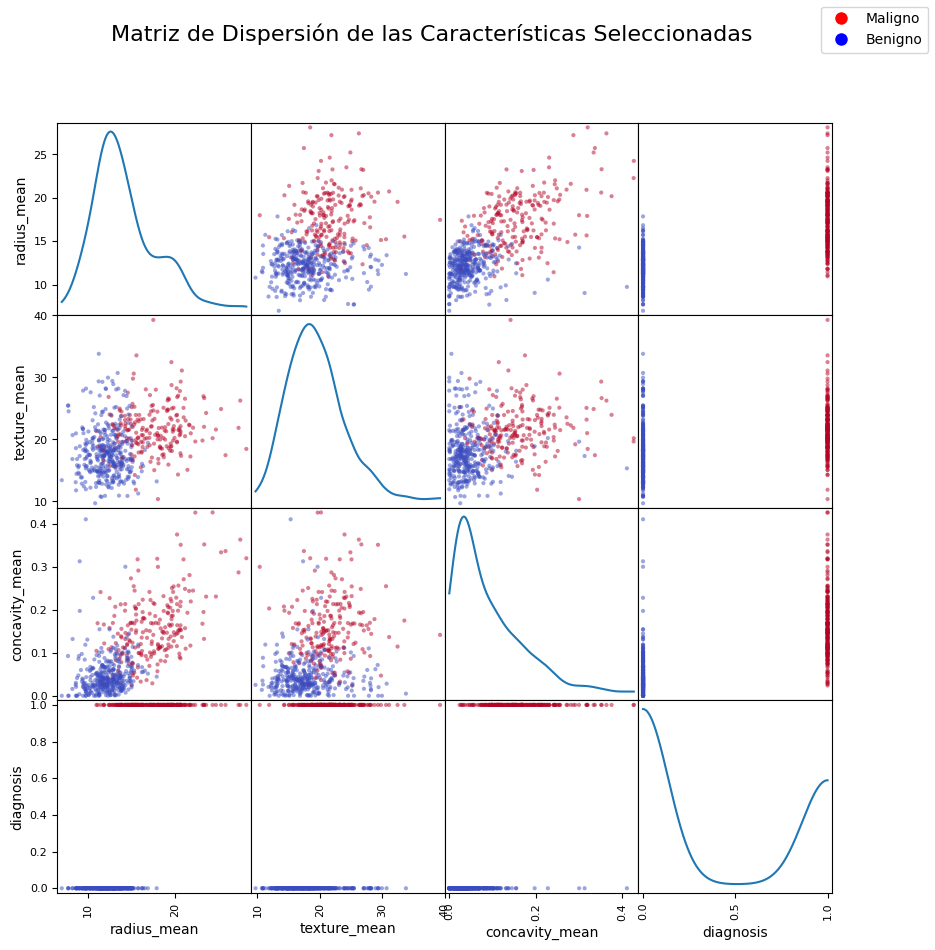

In [ ]:
# Creacion de la matriz de dispersion
colors = {1: 'red', 0: 'blue'}
scatter_matrix(df_selected, figsize=(10, 10), diagonal='kde', c=df['diagnosis'], cmap='coolwarm')
plt.suptitle('Matriz de Dispersión de las Características Seleccionadas', fontsize=16)
plt.figlegend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Maligno'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Benigno')],
              loc='upper right')
plt.show()

De las matrices de dispersión analizadas, se evidencia una correlación significativa entre las tres variables evaluadas: radius_mean, texture_mean y concavity_mean. Se observa que las muestras malignas presentan valores más altos en cada uno de estos parámetros, lo que sugiere que los tumores malignos suelen tener núcleos más grandes. Además, los tumores malignos exhiben mayores valores de textura, lo cual puede reflejar una mayor irregularidad en la estructura celular. Esta correlación sugiere patrones distintivos que pueden ser relevantes para la identificación y el diagnóstico de tumores malignos.

# Ajuste del modelo lineal:


> Para estimar la variable dependiente a partir de las caracteristicas (predictores) ajustaremos un modelo de regresion lineal usando **Ordinary Least Squares, OLS**





In [ ]:
# Limpiar el conjunto de datos (eliminar columnas irrelevantes)
data_clean = df.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
# Separar características (X) y objetivo (y)
X = data_clean.drop('diagnosis', axis=1)
y = data_clean['diagnosis']

In [ ]:
# Función para entrenar el modelo y calcular el MSE y el R² score
def train_and_evaluate_linear_model(train_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

## Estimacion del error

>Para estimar el error del modelo se emplearon tres proporciones de datos para entrenarlo y otro para validarlo.

Las proporciones usados fueron los siguientes:

---
* 70 - 30
* 50 - 50
* 40 - 60


In [ ]:
# Evaluar el modelo con diferentes divisiones de entrenamiento/prueba
train_test_splits = {
    '70-30': train_and_evaluate_linear_model(0.7, 0.3),
    '50-50': train_and_evaluate_linear_model(0.5, 0.5),
    '40-60': train_and_evaluate_linear_model(0.4, 0.6)
}

In [ ]:
# Convertir a un DataFrame para mostrar
resultados_df = pd.DataFrame(train_test_splits.items(), columns=['Proporción', 'Métricas'])
resultados_df['MSE'] = resultados_df['Métricas'].apply(lambda x: x[0])
resultados_df['R² Score'] = resultados_df['Métricas'].apply(lambda x: x[1])
resultados_df = resultados_df.drop('Métricas', axis=1)

# Mostrar los resultados
print(resultados_df)

  Proporción       MSE  R² Score
0      70-30  0.067284  0.710840
1      50-50  0.061434  0.727709
2      40-60  0.071955  0.687561


Al usar diferentes proporciones de train/test set, el desempeño del modelo cambia de la siguiente forma:

* **70-30:** El modelo tiene suficiente información para entrenar y también para evaluar, logrando un buen balance. Es una proporción comúnmente utilizada.

* **50-50:** Al haber menos datos para entrenar, el modelo puede aprender un poco menos, pero aún tiene un buen desempeño.

* **40-60:** Con menos datos para entrenar, el modelo tiene menos información para aprender, lo que puede reducir su rendimiento.


## Cambio del metodo de optimizacion

> Para observar si el modelo presenta cambios ajustaremos nuestro dataset al modelo de optimizacion **Stochastic Gradient Descent**


Primero entrenamos el modelo nuevamente para obtener parametros y coeficientes validos en SGD

In [ ]:
# Función para entrenar el modelo con un optimizador y calcular métricas
def train_and_evaluate_model_with_optimizer(optimizer, train_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = optimizer
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [ ]:
# Evaluar el modelo de regresión lineal estándar
linear_model_mse_0, linear_model_r2_0 = train_and_evaluate_model_with_optimizer(LinearRegression(), 0.7, 0.3)
linear_model_mse_1, linear_model_r2_1 = train_and_evaluate_model_with_optimizer(LinearRegression(), 0.5, 0.5)
linear_model_mse_2, linear_model_r2_2 = train_and_evaluate_model_with_optimizer(LinearRegression(), 0.4, 0.6)


In [ ]:
# Evaluar el modelo de regresión con SGD (Stochastic Gradient Descent)
sgd_model_mse_0, sgd_model_r2_0 = train_and_evaluate_model_with_optimizer(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42), 0.7, 0.3)
sgd_model_mse_1, sgd_model_r2_1 = train_and_evaluate_model_with_optimizer(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42), 0.5, 0.5)
sgd_model_mse_2, sgd_model_r2_2 = train_and_evaluate_model_with_optimizer(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42), 0.4, 0.6)


In [ ]:
resultados = {
    'Regresión Lineal (MSE)': [linear_model_mse_0, linear_model_mse_1, linear_model_mse_2],
    'Regresión Lineal (R²)': [linear_model_r2_0, linear_model_r2_1, linear_model_r2_2],
    'SGD (MSE)': [sgd_model_mse_0, sgd_model_mse_1, sgd_model_mse_2],
    'SGD (R²)': [sgd_model_r2_0, sgd_model_r2_1, sgd_model_r2_2]
}

resultados_df = pd.DataFrame(resultados, index=['70% train, 30% test', '50% train, 50% test', '40% train, 60% test'])
print(resultados_df)

                     Regresión Lineal (MSE)  Regresión Lineal (R²)  \
70% train, 30% test                0.067284               0.710840   
50% train, 50% test                0.061434               0.727709   
40% train, 60% test                0.071955               0.687561   

                        SGD (MSE)      SGD (R²)  
70% train, 30% test  1.965960e+29 -8.448947e+29  
50% train, 50% test  5.080018e+29 -2.251580e+30  
40% train, 60% test  2.421687e+29 -1.051528e+30  


Los resultados muestran que la regresión lineal estándar tiene un buen desempeño en todas las divisiones de entrenamiento, como se observa en la división $ 70\% $ entrenamiento, $30\%$ prueba, donde se obtuvo un MSE de $0.067$ y un $R^2$ de $0.71$, lo que indica que el modelo explica bien la variabilidad en los datos. Por el contrario, el modelo con SGD, en la misma división, presenta un MSE extremadamente alto de $1.965960e+29$ y un $R^²$ negativo de $-8.448947e+29$, lo que indica que no logra ajustarse correctamente a los datos y ofrece un rendimiento muy deficiente.

## Metodo de regularizacion


> Para evaluar la forma en la que ve afectado el desempeño de nuestro modelo con el uso de un metodo de regularizacion estaremos usando



In [ ]:
# Función para entrenar el modelo con regularización y calcular métricas
def train_and_evaluate_model_with_regularization(regularizer, train_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = regularizer
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [ ]:
resultados = {}

In [ ]:
# 70-30
ridge_mse_70, ridge_r2_70 = train_and_evaluate_model_with_regularization(Ridge(alpha=1.0), 0.7, 0.3)
lasso_mse_70, lasso_r2_70 = train_and_evaluate_model_with_regularization(Lasso(alpha=0.1), 0.7, 0.3)
resultados['70-30'] = {'Ridge (L2)': [ridge_mse_70, ridge_r2_70], 'Lasso (L1)': [lasso_mse_70, lasso_r2_70]}

In [ ]:
# 50-50
ridge_mse_50, ridge_r2_50 = train_and_evaluate_model_with_regularization(Ridge(alpha=1.0), 0.5, 0.5)
lasso_mse_50, lasso_r2_50 = train_and_evaluate_model_with_regularization(Lasso(alpha=0.1), 0.5, 0.5)
resultados['50-50'] = {'Ridge (L2)': [ridge_mse_50, ridge_r2_50], 'Lasso (L1)': [lasso_mse_50, lasso_r2_50]}

In [ ]:
# 40-60
ridge_mse_40, ridge_r2_40 = train_and_evaluate_model_with_regularization(Ridge(alpha=1.0), 0.4, 0.6)
lasso_mse_40, lasso_r2_40 = train_and_evaluate_model_with_regularization(Lasso(alpha=0.1), 0.4, 0.6)
resultados['40-60'] = {'Ridge (L2)': [ridge_mse_40, ridge_r2_40], 'Lasso (L1)': [lasso_mse_40, lasso_r2_40]}

In [ ]:
resultados_df = pd.DataFrame({key: pd.Series(value) for key, value in resultados.items()})
resultados_df.index = ['MSE', 'R² Score']

print(resultados_df)


                                              70-30  \
MSE       [0.05996831796005324, 0.7422790144811997]   
R² Score  [0.07088928915643287, 0.6953448406491396]   

                                              50-50  \
MSE       [0.06177103340384778, 0.7262167309708865]   
R² Score  [0.07479483829807443, 0.6684922655919951]   

                                              40-60  
MSE       [0.06824104874274792, 0.7036883830735876]  
R² Score  [0.07946828068451058, 0.6549382640240896]  


El metodo de regularizacion ayudó a mejorar el desempeño del modelo al evitar que se ajuste demasiado a los datos de entrenamiento (overfitting). En este caso, **Ridge (L2)** mejoró el modelo al reducir el error y hacer que el modelo generalice mejor, mientras que **Lasso (L1)** no fue tan efectivo, ya que eliminó algunas características importantes y redujo la precisión.



---



Ahora seleccionaremos la proporcion 50-50 de datos de entrenamiento y de validacion respectivamente, usaremos el metodo Ridge de regularizacion y el modelo de optimizacion Ordinary Least Squares(OLS)

In [ ]:
# Dividir el conjunto de datos en 50% entrenamiento y 50% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Entrenar el modelo con Ridge (L2 regularización)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Obtener los parámetros (pesos e intersección)
coeficientes = ridge_model.coef_
interseccion = ridge_model.intercept_

print("Coeficientes del modelo:", coeficientes)
print("Intersección (bias):", interseccion)

Coeficientes del modelo: [-0.1230558  -0.01387457  0.00549025  0.00076673  0.07470958 -0.05820567
  0.19903458  0.1877586   0.11842848 -0.00217901  0.37443467 -0.03159609
  0.01972619 -0.00195509  0.03362313 -0.02252621 -0.04191048  0.02830444
  0.01919236 -0.00152264  0.21636593  0.02183284 -0.00538129 -0.001074
  0.20106032  0.10698345  0.36535458  0.27581987  0.34503643  0.02378519]
Intersección (bias): -1.595285892447766


El **signo** de los coeficientes indica la dirección en la que una característica afecta la probabilidad de que el diagnóstico sea maligno: un coeficiente positivo aumenta la probabilidad de malignidad, mientras que un coeficiente negativo la disminuye. La **magnitud** de los coeficientes refleja la **fuerza de influencia** de cada característica en la predicción: cuanto mayor sea la magnitud, más importante es la característica para el modelo. Finalmente, la **intersección (bias)** es el valor base de la predicción cuando todas las características son iguales a cero, ajustando el modelo para mejorar las predicciones.



---



Acontinuacion obtendremos el MSE y el $R^2$ score del modelo anterior

In [ ]:
# Predecir con el conjunto de prueba
y_pred = ridge_model.predict(X_test)

In [ ]:
# Calcular MSE y R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MSE (Mean Squared Error): 0.0618
R² Score: 0.7262


El **MSE** de $0.0618$ nos indica que, en promedio, el error entre los valores predichos y los valores reales es relativamente bajo. Lo que sugiere que el modelo tiene un buen desempeño en términos de precisión, ya que los errores en las predicciones son pequeños.

El **R² Score** de $0.7262$ indica que el modelo es capaz de explicar aproximadamente el $72.62\%$ de la variabilidad en los datos. Esto significa que el modelo tiene un buen ajuste y es capaz de predecir con una precisión decente el resultado en función de las características del dataset. Sin embargo, todavía hay un $27.38\%$ de la variabilidad que no es explicada, lo cual puede sugerir que hay factores no capturados por el modelo que podrían mejorar su desempeño

# A manera de conclusion...

---




 Los modelos de regresión y los métodos de optimización son herramientas esenciales en el análisis de datos y la predicción de resultados. Los modelos de regresión permiten identificar relaciones entre variables y hacer predicciones basadas en patrones observados. Son fundamentales en muchas áreas, como la economía, la ingeniería, y la medicina, que es el caso especial tratado en este trabajo, donde se requiere hacer pronósticos precisos.

Por otro lado, los métodos de regularización, como Ridge (L2) y Lasso (L1), son técnicas clave para mejorar estos modelos. Estos métodos ayudan a evitar el sobreajuste, un problema común cuando un modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar bien en nuevos datos. La regularización simplifica el modelo y garantiza que las predicciones sean más confiables en situaciones reales.

Podemos decir entonces que la combinación de regresión y optimización es crucial para tomar decisiones informadas en el mundo moderno. A medida que crece la cantidad de datos, estas técnicas se vuelven aún más importantes para analizar información y resolver problemas complejos en diversas industrias.



---



Githubs de los integrantes:



```
# maledeltoro
```





```
# sergio110304
```





```
# Ahiruk
```

